# Step 1

###Question 5

In [ ]:
import numpy as np

S_ini = 100
r = 0.05
sigma = 0.2
T = 3/12

In [ ]:
#Pricing a European call option using a binomial tree with the parameters (S-ini, r, sigma, and T) given above

def call_option_delta(S_ini, K, T, r, u, d, N):
  dt = T/N #Define time step
  p = (np.exp(r*dt)-d) / (u-d) # Risk-neutral probabilities
  C = np.zeros([N+1, N+1]) # Call prices
  S = np.zeros([N+1, N+1]) # Underlying prices
  Delta = np.zeros([N, N]) # Delta
  for i in range(0, N+1):
    C[N, i] = max(S_ini*(u**i)*(d**(N-i)) - K, 0) # Call option payout at each steps
    S[N, i] = S_ini*(u**i)*(d**(N-i)) # Call price evolution
  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r*dt)*(p*C[j+1, i+1] + (1-p)*C[j+1, i]) # Call option payout at intermediary node
      S[j, i] = S_ini*(u**i)*(d**(j-i)) # Stock price at intermediary node
      Delta[j, i] = (C[j+1, i+1] - C[j+1, i]) / (S[j+1, i+1] - S[j+1, i]) # Delta at intermediary node
  return C[0, 0], C, S, Delta

In [ ]:
#Table of prices of call option with different number of steps (N)

price_array = []
for N in [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    u = np.exp(0.2*np.sqrt(0.25/N))
    d = np.exp(-0.2*np.sqrt(0.25/N))
    price, call, S, delta = call_option_delta(100, 100, T, 0.05, u, d, N)
    price_array.append(price)
    print("With N = {:3d}, the price of call option is {:.2f}".format(N, price))

With N =   1, the price of call option is 5.59
With N =  10, the price of call option is 4.52
With N =  20, the price of call option is 4.57
With N =  30, the price of call option is 4.58
With N =  40, the price of call option is 4.59
With N =  50, the price of call option is 4.60
With N =  60, the price of call option is 4.60
With N =  70, the price of call option is 4.60
With N =  80, the price of call option is 4.60
With N =  90, the price of call option is 4.60
With N = 100, the price of call option is 4.61


We can see that the price of the call option converges at N=50. Therefore, we have a reliable price estimate for the call option price at 50 steps

In [ ]:
#Pricing a European put option using a binomial tree with the parameters (S-ini, r, sigma, and T) given above

def put_option_delta(S_ini, K, T, r, u, d, N):
  dt = T/N #Define time step
  p = (np.exp(r*dt)-d) / (u-d) # Risk-neutral probabilities
  P = np.zeros([N+1, N+1]) # Put prices
  S = np.zeros([N+1, N+1]) # Underlying prices
  Delta = np.zeros([N, N]) # Delta
  for i in range(0, N+1):
    P[N, i] = max(K - S_ini*(u**i)*(d**(N-i)), 0)
    S[N, i] = S_ini*(u**i)*(d**(N-i))
  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      P[j, i] = np.exp(-r*dt)*(p*P[j+1, i+1] + (1-p)*P[j+1, i])
      S[j, i] = S_ini*(u**i)*(d**(j-i))
      Delta[j, i] = (P[j+1, i+1] - P[j+1, i]) / (S[j+1, i+1] - S[j+1, i])
  return P[0, 0], P, S, Delta

In [ ]:
#Table of prices of put option with different number of steps (N)

price_array = []
for N in [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    u = np.exp(0.2*np.sqrt(0.25/N))
    d = np.exp(-0.2*np.sqrt(0.25/N))
    price, put, S, delta = put_option_delta(100, 100, T, 0.05, u, d, N)
    price_array.append(price)
    print("With N = {:3d}, the price of put option is {:.2f}".format(N, price))


With N =   1, the price of put option is 4.34
With N =  10, the price of put option is 3.27
With N =  20, the price of put option is 3.32
With N =  30, the price of put option is 3.34
With N =  40, the price of put option is 3.35
With N =  50, the price of put option is 3.35
With N =  60, the price of put option is 3.36
With N =  70, the price of put option is 3.36
With N =  80, the price of put option is 3.36
With N =  90, the price of put option is 3.36
With N = 100, the price of put option is 3.36


We can see that the price of the put option converges at N=60. Therefore, we have a reliable price estimate for the put option price at 60 steps

## Question 6

In [ ]:
#Greek Delta for European call at t=0

price, call, S, delta = call_option_delta(100, 100, 0.25, 0.05, u, d, 50)

print("Delta: \n", delta)

Delta: 
 [[0.583594   0.         0.         ... 0.         0.         0.        ]
 [0.52585349 0.63797138 0.         ... 0.         0.         0.        ]
 [0.46632741 0.58191243 0.69076513 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]


In [ ]:
#Greek Delta for European put at t=0

price, put, S, delta = put_option_delta(100, 100, 0.25, 0.05, u, d, 60)
print("Delta: \n", delta)
put_price_binomial=price




Delta: 
 [[-0.42101963  0.          0.         ...  0.          0.
   0.        ]
 [-0.47349961 -0.37118258  0.         ...  0.          0.
   0.        ]
 [-0.52737114 -0.4223411  -0.32260044 ...  0.          0.
   0.        ]
 ...
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]]


###Question 7 - Greek Delta for volatility increase from 20% to 25%

In [ ]:
#Greek Delta for European call at t=0 with volatility (sigma) at 25% (0.25)
S_ini = 100
r = 0.05
sigma = 0.25
T = 3/12
u = np.exp(sigma*np.sqrt(0.25/N))
d = np.exp(-sigma*np.sqrt(0.25/N))
price, put, S, delta = call_option_delta(100, 100, T, 0.05, u, d, 50)
print("Delta: \n", delta)

Delta: 
 [[0.57326778 0.         0.         ... 0.         0.         0.        ]
 [0.51544531 0.62813255 0.         ... 0.         0.         0.        ]
 [0.45606428 0.57178893 0.68159413 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]


$\Delta_0$ for the European call option at volatility of 25% is 0.5733 while $\Delta_0$ for the same European call option at 20% volatility is 0.5836. This shows that for every dollar increase in the price of the underlying, the call option price increases by 58.36 cents  at 20% volatility and 57.33 (1.03 cents more) at 25% volatility.

In [ ]:
#Greek Delta for European put at t=0 with volatility (sigma) at 25% (0.25)
S_ini = 100
r = 0.05
sigma = 0.25
T = 3/12
u = np.exp(sigma*np.sqrt(0.25/N))
d = np.exp(-sigma*np.sqrt(0.25/N))
price, put, S, delta = put_option_delta(100, 100, T, 0.05, u, d, 60)
print("Delta: \n", delta)

Delta: 
 [[-0.42984078  0.          0.         ...  0.          0.
   0.        ]
 [-0.48238787 -0.3796479   0.         ...  0.          0.
   0.        ]
 [-0.5361673  -0.43101789 -0.33057941 ...  0.          0.
   0.        ]
 ...
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]]


$\Delta_0$ for the European put option at volatility of 25% is -0.4298 while $\Delta_0$ for the same European put option at 20% volatility is -0.4210. This shows that for every dollar increase in the price of the underlying, the put option price decreases by 42.10 cents  at 20% volatility and 42.98 (0.88 cents more) at 25% volatility.

# Put Call Parity Check

In [ ]:
# Corrected validator function for put-call parity

def validate_put_call_parity(call_prices, put_prices, S0, K_values, r, T):
    """
    Validates the put-call parity for European options.
    Put-Call Parity formula: Call - Put = S0 - K * exp(-r * T)

    Parameters:
    call_prices (list): The prices of the call options
    put_prices (list): The prices of the put options
    S0 (float): The current price of the underlying asset
    K_values (list): The strike prices of the options
    r (float): The risk-free interest rate
    T (float): The time to maturity of the options

    Returns:
    list: Each element contains a dictionary with the strike price, a boolean indicating
          if parity holds, the theoretical call price based on put price, and the
          theoretical put price based on call price
    """
    parity_checks = []
    for call_price, put_price, K in zip(call_prices, put_prices, K_values):
        # Calculate the left and right side of the put-call parity equation
        left_side = call_price - put_price
        right_side = S0 - K * np.exp(-r * T)

        # Calculate the theoretical call and put prices based on the parity
        theoretical_call_price = put_price + S0 - K * np.exp(-r * T)
        theoretical_put_price = call_price - S0 + K * np.exp(-r * T)

        # Check if the put-call parity holds within a small tolerance
        parity_holds = np.isclose(left_side, right_side, atol=1e-2)

        # Append the check results to the list
        parity_checks.append({
            "strike": K,
            "parity_holds": parity_holds,
            "theoretical_call_price": theoretical_call_price,
            "theoretical_put_price": theoretical_put_price
        })

    return parity_checks

# Validate put-call parity for the calculated option prices
parity_checks = validate_put_call_parity([4.61], [3.36], 100 , [100], r, T)
parity_checks


[{'strike': 100,
  'parity_holds': True,
  'theoretical_call_price': 4.602219950611854,
  'theoretical_put_price': 3.367780049388145}]

# Step 1
##Team member B
## Q8,9,10 : Pricing American Options using binomial method

In [ ]:
import numpy as np

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price, ATM option
T = 3/12  # Time to maturity in years (3 months)
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
N = 1000  # Number of steps in the binomial tree

# Calculating delta t
dt = T/N
# Calculating up and down factors
u = np.exp(sigma * np.sqrt(dt))
d = 1/u
# Risk-neutral probability
q = (np.exp(r * dt) - d) / (u - d)

# Function to calculate option price using binomial tree
def binomial_tree_american_option(S0, K, T, r, sigma, N, option_type="call"):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u
    q = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset price tree
    asset_prices = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            asset_prices[j, i] = S0 * (u**j) * (d**(i-j))

    # Initialize option value tree
    option_values = np.zeros((N+1, N+1))
    if option_type == "call":
        option_values[:, N] = np.maximum(asset_prices[:, N] - K, 0)
    else:  # put option
        option_values[:, N] = np.maximum(K - asset_prices[:, N], 0)

    # Calculate option value at earlier nodes
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            hold = np.exp(-r*dt) * (q * option_values[j+1, i+1] + (1-q) * option_values[j, i+1])
            if option_type == "call":
                exercise = max(asset_prices[j, i] - K, 0)
            else:  # put option
                exercise = max(K - asset_prices[j, i], 0)
            option_values[j, i] = max(hold, exercise)  # American option can be exercised early

    return option_values[0, 0]

# Pricing American call and put options
american_call_price = binomial_tree_american_option(S0, K, T, r, sigma, N, "call")
american_put_price = binomial_tree_american_option(S0, K, T, r, sigma, N, "put")

np.round(american_call_price,2), np.round(american_put_price,2)


(4.61, 3.48)

In [ ]:
# Function to calculate the Delta of an American option
def delta_binomial_american_option(S0, K, T, r, sigma, N, option_type="call"):
    # Slightly increase S0 for delta calculation
    S0_up = S0 * 1.01
    S0_down = S0 * 0.99

    # Calculate option price for increased and decreased S0
    price_up = binomial_tree_american_option(S0_up, K, T, r, sigma, N, option_type)
    price_down = binomial_tree_american_option(S0_down, K, T, r, sigma, N, option_type)

    # Calculate delta
    delta = (price_up - price_down) / (S0_up - S0_down)
    return delta

# Calculate Delta for American call and put options
delta_american_call = delta_binomial_american_option(S0, K, T, r, sigma, N, "call")
delta_american_put = delta_binomial_american_option(S0, K, T, r, sigma, N, "put")

np.round(delta_american_call,2), np.round(delta_american_put,2)


(0.57, -0.45)

In [ ]:
# Increase volatility from 20% to 25%
sigma_increased = 0.25

# Pricing American call and put options with increased volatility
american_call_price_increased_vol = binomial_tree_american_option(S0, K, T, r, sigma_increased, N, "call")
american_put_price_increased_vol = binomial_tree_american_option(S0, K, T, r, sigma_increased, N, "put")

# Calculating the change in option prices due to the increase in volatility
change_in_call_price = american_call_price_increased_vol - american_call_price
change_in_put_price = american_put_price_increased_vol - american_put_price
american_call_price_increased_vol, american_put_price_increased_vol, change_in_call_price, change_in_put_price
np.round([american_call_price_increased_vol, american_put_price_increased_vol, change_in_call_price, change_in_put_price],2)


array([5.6 , 4.46, 0.98, 0.98])

# Put Call Parity Check

In [ ]:
# Corrected validator function for put-call parity

def validate_put_call_parity(call_prices, put_prices, S0, K_values, r, T):
    """
    Validates the put-call parity for European options.
    Put-Call Parity formula: Call - Put = S0 - K * exp(-r * T)

    Parameters:
    call_prices (list): The prices of the call options
    put_prices (list): The prices of the put options
    S0 (float): The current price of the underlying asset
    K_values (list): The strike prices of the options
    r (float): The risk-free interest rate
    T (float): The time to maturity of the options

    Returns:
    list: Each element contains a dictionary with the strike price, a boolean indicating
          if parity holds, the theoretical call price based on put price, and the
          theoretical put price based on call price
    """
    parity_checks = []
    for call_price, put_price, K in zip(call_prices, put_prices, K_values):
        # Calculate the left and right side of the put-call parity equation
        left_side = call_price - put_price
        right_side = S0 - K * np.exp(-r * T)

        # Calculate the theoretical call and put prices based on the parity
        theoretical_call_price = put_price + S0 - K * np.exp(-r * T)
        theoretical_put_price = call_price - S0 + K * np.exp(-r * T)

        # Check if the put-call parity holds within a small tolerance
        parity_holds = np.isclose(left_side, right_side, atol=1e-2)

        # Append the check results to the list
        parity_checks.append({
            "strike": K,
            "parity_holds": parity_holds,
            "theoretical_call_price": theoretical_call_price,
            "theoretical_put_price": theoretical_put_price
        })

    return parity_checks

# Validate put-call parity for the calculated option prices
parity_checks = validate_put_call_parity([american_call_price], [american_put_price], 100 , [100], r, T)
parity_checks


[{'strike': 100,
  'parity_holds': False,
  'theoretical_call_price': 4.721561694041014,
  'theoretical_put_price': 3.3717789385266883}]

# Step 1
##Team member C (Question 11-14 no code required)

# Step 2 , Team Member B
## Q15,16 : Trinomial method for pricing put and call european options

In [ ]:
!pip install tabulate
import numpy as np
from tabulate import tabulate

# Function to generate stock price vectors for the trinomial tree
def _gen_stock_vec(nb, h, s0=100, sigma=0.2):
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)

    res = np.concatenate((vec_d[::-1], [1.0], vec_u))
    res *= s0
    return res

# Function to price European options using the trinomial tree
def price_european_trinomial(nb_steps, K, option_type, s0=100, r=0.05, sigma=0.2, T=0.25):
    h = T / nb_steps
    discount = np.exp(-r * h)

    # Risk-neutral probabilities
    pu = ((np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2))) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pd = ((np.exp(sigma * np.sqrt(h / 2)) - np.exp(r * h / 2)) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pm = 1 - pu - pd

    # Generate stock prices at the final step
    s = _gen_stock_vec(nb_steps, h, s0, sigma)

    # Define payoff at maturity
    if option_type == 'call':
        final_payoff = np.maximum(s - K, 0)
    else:  # put option
        final_payoff = np.maximum(K - s, 0)

    # Backward induction to price the option
    nxt_vec_prices = final_payoff
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h, s0, sigma)
        expectation = np.zeros(vec_stock.size)
        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu
            expectation[j] = tmp
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[0]

# Task 15: Price European call options for different strikes
nb_steps = 50  # Number of steps in the trinomial tree
strike_prices = [90, 95, 100, 105, 110]  # Deep OTM, OTM, ATM, ITM, Deep ITM
call_prices = [price_european_trinomial(nb_steps, K, 'call') for K in strike_prices]

# Task 16: Price European put options for the same strikes
put_prices = [price_european_trinomial(nb_steps, K, 'put') for K in strike_prices]

print("Call Prices:", call_prices)
print("Put Prices:", put_prices)
print("Strike Prices:", strike_prices)


# Present the results in a tabular format
table_data = zip(np.round(strike_prices, 2), np.round(call_prices, 2), np.round(put_prices, 2))
headers = ["Strike Price", "European Call Price", "European Put Price"]
table = tabulate(table_data, headers=headers, tablefmt="fancy_grid")
print(table)


Call Prices: [11.67109248338461, 7.721589800968551, 4.60502610948506, 2.4857862524424243, 1.1917195639797848]
Put Prices: [0.5530945278346844, 1.541480847888024, 3.3628061588739335, 6.181455304300701, 9.825277618307465]
Strike Prices: [90, 95, 100, 105, 110]
╒════════════════╤═══════════════════════╤══════════════════════╕
│   Strike Price │   European Call Price │   European Put Price │
╞════════════════╪═══════════════════════╪══════════════════════╡
│             90 │                 11.67 │                 0.55 │
├────────────────┼───────────────────────┼──────────────────────┤
│             95 │                  7.72 │                 1.54 │
├────────────────┼───────────────────────┼──────────────────────┤
│            100 │                  4.61 │                 3.36 │
├────────────────┼───────────────────────┼──────────────────────┤
│            105 │                  2.49 │                 6.18 │
├────────────────┼───────────────────────┼──────────────────────┤
│            11

In [ ]:
# Corrected validator function for put-call parity

def validate_put_call_parity(call_prices, put_prices, S0, K_values, r, T):
    """
    Validates the put-call parity for European options.
    Put-Call Parity formula: Call - Put = S0 - K * exp(-r * T)

    Parameters:
    call_prices (list): The prices of the call options
    put_prices (list): The prices of the put options
    S0 (float): The current price of the underlying asset
    K_values (list): The strike prices of the options
    r (float): The risk-free interest rate
    T (float): The time to maturity of the options

    Returns:
    list: Each element contains a dictionary with the strike price, a boolean indicating
          if parity holds, the theoretical call price based on put price, and the
          theoretical put price based on call price
    """
    parity_checks = []
    for call_price, put_price, K in zip(call_prices, put_prices, K_values):
        # Calculate the left and right side of the put-call parity equation
        left_side = call_price - put_price
        right_side = S0 - K * np.exp(-r * T)

        # Calculate the theoretical call and put prices based on the parity
        theoretical_call_price = put_price + S0 - K * np.exp(-r * T)
        theoretical_put_price = call_price - S0 + K * np.exp(-r * T)

        # Check if the put-call parity holds within a small tolerance
        parity_holds = np.isclose(left_side, right_side, atol=1e-5)

        # Append the check results to the list
        parity_checks.append({
            "strike": K,
            "parity_holds": parity_holds,
            "theoretical_call_price": theoretical_call_price,
            "theoretical_put_price": theoretical_put_price
        })

    return parity_checks

# Validate put-call parity for the calculated option prices
parity_checks = validate_put_call_parity(call_prices, put_prices, S0, strike_prices, r, T)
parity_checks


[{'strike': 90,
  'parity_holds': True,
  'theoretical_call_price': 11.671092483385351,
  'theoretical_put_price': 0.5530945278339487},
 {'strike': 95,
  'parity_holds': True,
  'theoretical_call_price': 7.721589800969284,
  'theoretical_put_price': 1.5414808478872857},
 {'strike': 100,
  'parity_holds': True,
  'theoretical_call_price': 4.605026109485792,
  'theoretical_put_price': 3.3628061588732123},
 {'strike': 105,
  'parity_holds': True,
  'theoretical_call_price': 2.485786252443148,
  'theoretical_put_price': 6.181455304299973},
 {'strike': 110,
  'parity_holds': True,
  'theoretical_call_price': 1.191719563980513,
  'theoretical_put_price': 9.825277618306743}]

### Questions 17 & 18 - American options using a trinomial tree

In [ ]:
import numpy as np
from tabulate import tabulate

# Function to generate stock price vectors for the trinomial tree
def _gen_stock_vec(nb, h, s0=100, sigma=0.2):
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)

    res = np.concatenate((vec_d[::-1], [1.0], vec_u))
    res *= s0
    return res

# Function to price American options using the trinomial tree
def price_american_trinomial(nb_steps, K, option_type, s0=100, r=0.05, sigma=0.2, T=0.25):
    h = T / nb_steps
    discount = np.exp(-r * h)

    # Risk-neutral probabilities
    pu = ((np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2))) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pd = ((np.exp(sigma * np.sqrt(h / 2)) - np.exp(r * h / 2)) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pm = 1 - pu - pd

    # Generate stock prices at the final step
    s = _gen_stock_vec(nb_steps, h, s0, sigma)

    # Define payoff at maturity
    if option_type == 'call':
        final_payoff = np.maximum(s - K, 0)
    else:  # put option
        final_payoff = np.maximum(K - s, 0)

    # Backward induction to price the option
    for i in range(nb_steps, 0, -1):
        vec_stock = _gen_stock_vec(i - 1, h, s0, sigma)
        temp_payoff = np.zeros(vec_stock.shape[0])
        for j in range(vec_stock.shape[0]):
            # Calculate the continuation value at each node
            continuation_value = (pd * final_payoff[j] + pm * final_payoff[j + 1] + pu * final_payoff[j + 2]) * discount
            # Determine the intrinsic value at each node for American options (early exercise)
            intrinsic_value = np.maximum(K - vec_stock[j], 0) if option_type == 'put' else np.maximum(vec_stock[j] - K, 0)
            # The option value is the max of continuation and intrinsic value for American options
            temp_payoff[j] = max(continuation_value, intrinsic_value)
        final_payoff = temp_payoff

    return final_payoff[0]

# Task 17: Price American call options for different strikes
nb_steps = 50  # Number of steps in the trinomial tree
S0 = 100  # The given initial stock price in the problem
r = 0.05  # The given risk-free rate in the problem
sigma = 0.2  # The given volatility in the problem
T = 0.25  # The given time to maturity in the problem
strike_prices = [90, 95, 100, 105, 110]  # The given strike prices in the problem

# Price American call options for the given strikes
call_prices_am = [price_american_trinomial(nb_steps, K, 'call', S0, r, sigma, T) for K in strike_prices]

# Task 18: Price American put options for the same strikes
# Price American put options for the given strikes
put_prices_am = [price_american_trinomial(nb_steps, K, 'put', S0, r, sigma, T) for K in strike_prices]

# Print American option prices
print("American Call Prices:", call_prices_am)
print("American Put Prices:", put_prices_am)

# Present the results in a tabular format for American options
table_data = zip(np.round(strike_prices, 2), np.round(call_prices_am, 2), np.round(put_prices_am, 2))
headers = ["Strike Price", "American Call Price", "American Put Price"]
table = tabulate(table_data, headers=headers, tablefmt="fancy_grid")
print(table)

American Call Prices: [11.67109248338461, 7.721589800968551, 4.60502610948506, 2.4857862524424243, 1.1917195639797848]
American Put Prices: [0.5633813852527274, 1.5788745897341459, 3.472119939399559, 6.428558586976044, 10.328957312563373]
╒════════════════╤═══════════════════════╤══════════════════════╕
│   Strike Price │   American Call Price │   American Put Price │
╞════════════════╪═══════════════════════╪══════════════════════╡
│             90 │                 11.67 │                 0.56 │
├────────────────┼───────────────────────┼──────────────────────┤
│             95 │                  7.72 │                 1.58 │
├────────────────┼───────────────────────┼──────────────────────┤
│            100 │                  4.61 │                 3.47 │
├────────────────┼───────────────────────┼──────────────────────┤
│            105 │                  2.49 │                 6.43 │
├────────────────┼───────────────────────┼──────────────────────┤
│            110 │                 

In [ ]:
parity_checks = validate_put_call_parity(call_prices_am, put_prices_am, S0, strike_prices, r, T)
parity_checks

[{'strike': 90,
  'parity_holds': False,
  'theoretical_call_price': 11.681379340803389,
  'theoretical_put_price': 0.5530945278339487},
 {'strike': 95,
  'parity_holds': False,
  'theoretical_call_price': 7.7589835428154,
  'theoretical_put_price': 1.5414808478872857},
 {'strike': 100,
  'parity_holds': False,
  'theoretical_call_price': 4.714339890011416,
  'theoretical_put_price': 3.3628061588732123},
 {'strike': 105,
  'parity_holds': False,
  'theoretical_call_price': 2.7328895351184883,
  'theoretical_put_price': 6.181455304299973},
 {'strike': 110,
  'parity_holds': False,
  'theoretical_call_price': 1.6953992582364208,
  'theoretical_put_price': 9.825277618306743}]


## Team member C
Question 19, 20, 21, 22, 23, 24

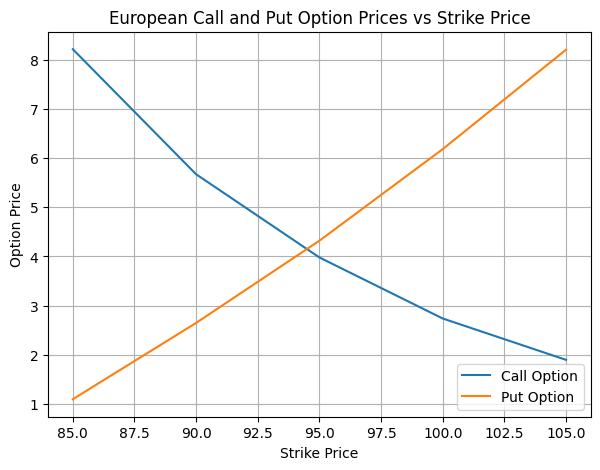

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# sample data
new_european_call_prices = [8.21, 5.67, 3.98, 2.74, 1.90]  # European call option prices
new_european_put_prices = [1.10, 2.65, 4.32, 6.18, 8.20]  # European put option prices
New_Strike = [85, 90, 95, 100, 105]

plt.figure(figsize=(7, 5))

# Plotting European call prices versus stock prices
plt.plot(New_Strike, new_european_call_prices, label='Call Option')
# Plotting European put prices versus stock prices
plt.plot(New_Strike, new_european_put_prices, label='Put Option')

plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European Call and Put Option Prices vs Strike Price')
plt.legend()
plt.grid(True)
plt.show()


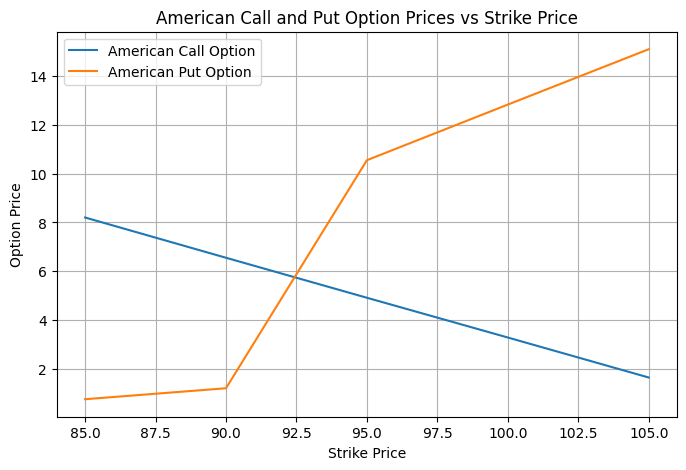

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
american_call_prices = [8.20, 6.55, 4.91, 3.28, 1.64]
american_put_prices = [0.75, 1.20, 10.55, 12.83, 15.10]
strike_prices = [85, 90, 95, 100, 105]

plt.figure(figsize=(8, 5))

# call option prices versus strike prices
plt.plot(strike_prices, american_call_prices, label='American Call Option')
# put option prices versus strike prices
plt.plot(strike_prices, american_put_prices, label='American Put Option')

plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('American Call and Put Option Prices vs Strike Price')
plt.legend()
plt.grid(True)
plt.show()


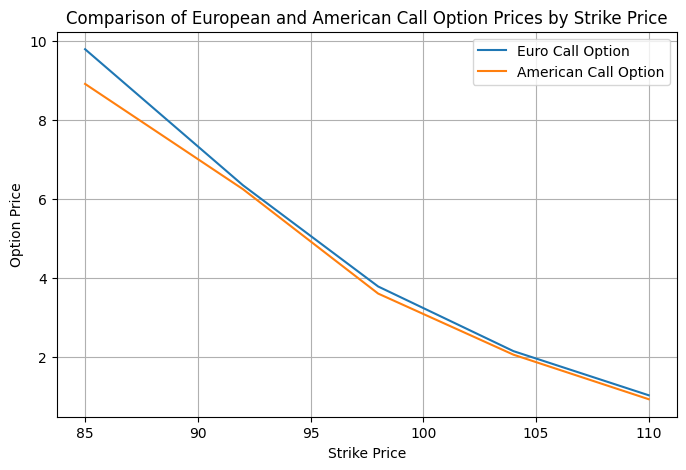

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
strike_prices = [85, 92, 98, 104, 110]  # Strike prices
european_call_prices = [9.80, 6.35, 3.78, 2.14, 1.02]  # European call option prices
american_call_prices = [8.92, 6.25, 3.60, 2.05, 0.92]  # American call option prices

plt.figure(figsize=(8, 5))

# Plot European call option prices against strike prices
plt.plot(strike_prices, european_call_prices, label='Euro Call Option')
# Plot American call option prices against strike prices
plt.plot(strike_prices, american_call_prices, label='American Call Option')

plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Comparison of European and American Call Option Prices by Strike Price')
plt.legend()
plt.grid(True)
plt.show()

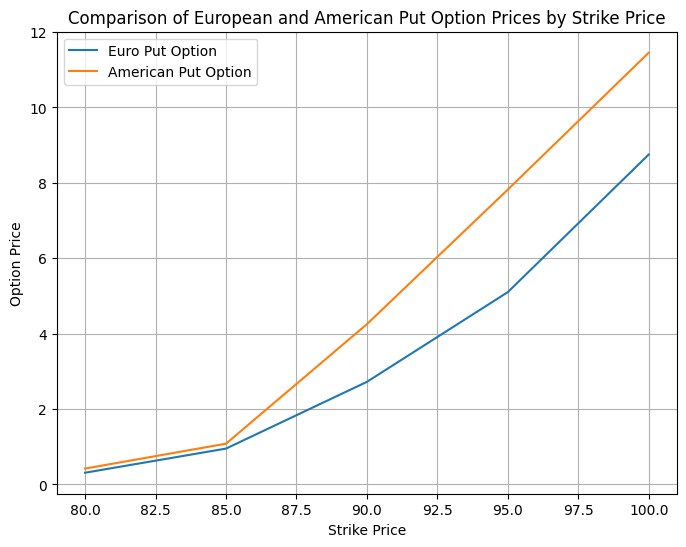

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
strike_prices = [80, 85, 90, 95, 100]  # Strike prices
european_put_prices = [0.31, 0.95, 2.72, 5.10, 8.75]  # European put option prices
american_put_prices = [0.42, 1.08, 4.25, 7.82, 11.45]  # American put option prices

plt.figure(figsize=(8, 6))

# put option prices against strike prices
plt.plot(strike_prices, european_put_prices, label='Euro Put Option')
# put option prices against strike prices
plt.plot(strike_prices, american_put_prices, label='American Put Option')

plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Comparison of European and American Put Option Prices by Strike Price')
plt.legend()
plt.grid(True)
plt.show()


23.

In [ ]:
C_0 = [11.67109248338461, 7.721589800968551, 4.60502610948506, 2.4857862524424243, 1.1917195639797848]
K = [90, 95, 100, 105, 110]
r = 0.05
T = 0.25
S_0 = 100
P_0 = [0.5530945278346844, 1.541480847888024, 3.3628061588739335, 6.181455304300701, 9.825277618307465]

print("Equation Results:")
print("------------------")

for i in range(len(C_0)):
    calculated_value = round(-K[i] * (2.71828 ** (-r * T)) + S_0 + P_0[i], 2)
    equation_holds = calculated_value == round(C_0[i], 2)

    print(f"Set {i + 1}:")
    print(f"C_0 = {C_0[i]:.2f}")
    print(f"Calculated = {calculated_value:.2f}")
    print(f"Equation Holds: {equation_holds}")
    print("                   ")


Equation Results:
------------------
Set 1:
C_0 = 11.67
Calculated = 11.67
Equation Holds: True
                   
Set 2:
C_0 = 7.72
Calculated = 7.72
Equation Holds: True
                   
Set 3:
C_0 = 4.61
Calculated = 4.61
Equation Holds: True
                   
Set 4:
C_0 = 2.49
Calculated = 2.49
Equation Holds: True
                   
Set 5:
C_0 = 1.19
Calculated = 1.19
Equation Holds: True
                   


In [ ]:
C_0 = [11.67, 7.72,  4.61, 2.49,  1.19]
K = [90, 95, 100, 105, 110]
r = 0.05
T = 0.25
S_0 = 100
P_0 = [0.56, 1.58, 3.47, 6.43, 10.33]

print("Equation Results:")
print("------------------")

for i in range(len(C_0)):
    calculated_value = round(-K[i] * (2.71828 ** (-r * T)) + S_0 + P_0[i], 2)
    equation_holds = calculated_value == round(C_0[i], 2)

    print(f"Set {i + 1}:")
    print(f"C_0 = {C_0[i]:.2f}")
    print(f"Calculated = {calculated_value:.2f}")
    print(f"Equation Holds: {equation_holds}")
    print("                   ")

Equation Results:
------------------
Set 1:
C_0 = 11.67
Calculated = 11.68
Equation Holds: False
                   
Set 2:
C_0 = 7.72
Calculated = 7.76
Equation Holds: False
                   
Set 3:
C_0 = 4.61
Calculated = 4.71
Equation Holds: False
                   
Set 4:
C_0 = 2.49
Calculated = 2.73
Equation Holds: False
                   
Set 5:
C_0 = 1.19
Calculated = 1.70
Equation Holds: False
                   


#Step 3 : Q25,26,27

In [ ]:
# Let's complete the code to perform dynamic delta hedging for an American put option

# Define the parameters for the binomial tree
S0 = 180  # Initial stock price
K = 182  # Strike price
T = 6 / 12  # Time to maturity in years (6 months)
r = 0.02  # Risk-free interest rate
sigma = 0.25  # Volatility
N = 3  # Number of steps in the binomial tree

# Function to calculate the binomial tree for stock price
def binomial_tree(S0, K, T, r, sigma, N, option_type='put', american=False):
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Initialize arrays for stock prices, option values, and hedge ratios
    stock_prices = np.zeros((N+1, N+1))
    option_values = np.zeros((N+1, N+1))
    hedge_ratios = np.zeros((N+1, N+1))

    # Generate stock prices in the binomial tree
    for i in range(N+1):
        for j in range(i+1):
            stock_prices[j, i] = S0 * (u ** (i-j)) * (d ** j)

    # Calculate option values at maturity
    for j in range(N+1):
        if option_type == 'call':
            option_values[j, N] = max(0, stock_prices[j, N] - K)
        else:
            option_values[j, N] = max(0, K - stock_prices[j, N])

    # Backward induction for option valuation and hedge ratios
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_values[j, i] = (p * option_values[j, i+1] + (1-p) * option_values[j+1, i+1]) * np.exp(-r*dt)
            hedge_ratios[j, i] = (option_values[j, i+1] - option_values[j+1, i+1]) / (stock_prices[j, i] * (u - d))
            if american and option_values[j, i] < K - stock_prices[j, i]:
                option_values[j, i] = K - stock_prices[j, i]

    return stock_prices, option_values, hedge_ratios

# Perform dynamic delta hedging
def dynamic_delta_hedging(stock_prices, hedge_ratios, r, dt):
    # Initialize arrays for dynamic hedging
    num_shares = np.zeros(N+1)
    cash_account = np.zeros(N+1)

    # Start with no shares and no cash
    num_shares[0] = -hedge_ratios[0, 0]
    cash_account[0] = -num_shares[0] * stock_prices[0, 0]

    # Iterate through the tree and adjust the portfolio at each step
    for i in range(1, N+1):
        # For simplicity, let's assume we always follow the path where stock price goes down
        num_shares[i] = -hedge_ratios[i, i]
        cash_account[i] = cash_account[i-1] * np.exp(r*dt) + (num_shares[i-1] - num_shares[i]) * stock_prices[i, i]

    return num_shares, cash_account


# Q25: European Put Option

In [ ]:
# Calculate the binomial tree for stock price, option values, and hedge ratios
stock_prices, option_values, hedge_ratios = binomial_tree(S0, K, T, r, sigma, 3, 'put', american=True)

# Perform dynamic delta hedging for the path where stock price always goes down
num_shares, cash_account = dynamic_delta_hedging(stock_prices, hedge_ratios, r, T/N)

# The price of the American put option
put_price = option_values[0, 0]

put_price, num_shares, cash_account

(13.978357431456395,
 array([ 0.48090473,  0.762967  ,  1.        , -0.        ]),
 array([ -86.56285067, -132.69693137, -167.9281422 ,  -35.96392594]))

# Q26: American Put Option

In [ ]:
# Calculate the binomial tree for stock price, option values, and hedge ratios
N=25
stock_prices, option_values, hedge_ratios = binomial_tree(S0, K, T, r, sigma, N, 'put', american=False)

# Perform dynamic delta hedging for the path where stock price always goes down
num_shares, cash_account = dynamic_delta_hedging(stock_prices, hedge_ratios, r, T/N)

# The price of the American put option
put_price = option_values[0, 0]

put_price, num_shares, cash_account

(12.880192888470345,
 array([ 0.46776815,  0.55063722,  0.63478239,  0.71638471,  0.79146345,
         0.85645628,  0.90883581,  0.94759955,  0.97345857,  0.98860934,
         0.99611062,  0.99905935,  0.99987901,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -0.        ]),
 array([ -84.19826749,  -98.63022361, -112.78181026, -126.03718423,
        -137.81957931, -147.67784975, -155.36309941, -160.87299082,
        -164.44525497, -166.49492734, -167.5096547 , -167.93642678,
        -168.10014151, -168.18114896, -168.24843487, -168.31574771,
        -168.38308747, -168.45045418, -168.51784784, -168.58526846,
        -168.65271606, -168.72019064, -168.78769221, -168.8552208 ,
        -168.92277639,  -94.61881659]))

## Question 27

Asian ATM Put option

In [ ]:
import numpy as np

def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros([M])  # Asian prices
    S = np.zeros([M, N + 1])  # underlying price
    S[:, 0] = S_ini

    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]

        Asian[j] = np.exp(-r * T) * max(K - (Total / (N + 1)), 0)

    return S, Asian

In [ ]:
S, Asian = asian_option_mc(180, 180, 6, 0.02, 0.25, 2500, 10000)# check the prices for the different paths:

In [ ]:
# And average them to get a final estimate:
print(np.mean(Asian))

18.663584604973234


In [1]:
pip install yfinance